<a href="https://colab.research.google.com/github/pritiyadav888/Machine-Learning-Projects/blob/main/pima_india_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Predictive_Data/diabetes.csv')

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.shape

(768, 9)

In [12]:
# df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
# df.isnull().sum()

In [13]:
X= df.drop('Outcome', axis= 1)
y= df['Outcome']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.30, random_state= 42)

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=14)
dt_model.fit(X_train,y_train)
dt_model.score(X_train,y_train)
dt_model.score(X_test,y_test)
from sklearn.metrics import confusion_matrix
tree_pred=dt_model.predict(X_test)
confusion_matrix(y_test, tree_pred)
tree_pred1 = dt_model.predict(X_train)
confusion_matrix(y_train, tree_pred1)

array([[349,   0],
       [  0, 188]])

In [16]:
from sklearn.linear_model import LogisticRegression
dt_model = LogisticRegression()
dt_model.fit(X_train,y_train)
dt_model.score(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7821229050279329

In [17]:
dt_model.score(X_test,y_test)

0.7402597402597403

In [18]:
reg_pred=dt_model.predict(X_test)
confusion_matrix(y_test, reg_pred)

array([[121,  30],
       [ 30,  50]])

In [19]:
train_accuracy = []
test_accuracy = []
for depth in range(1,7):
    dt_model=DecisionTreeClassifier(max_depth=depth, random_state=14)
    dt_model.fit(X_train,y_train)
    train_accuracy.append(dt_model.score(X_train,y_train))
    test_accuracy.append(dt_model.score(X_test,y_test))
frame = pd.DataFrame({'max_depth':range(1,7),'train_acc':train_accuracy,'test_acc':test_accuracy})
frame


,max_depth,train_acc,test_acc
0,1,0.759777,0.718615
1,2,0.759777,0.718615
2,3,0.763501,0.718615
3,4,0.808194,0.705628
4,5,0.828678,0.753247
5,6,0.854749,0.696970


In [20]:
dt_model=DecisionTreeClassifier(max_depth=4,max_leaf_nodes=10,random_state=5)
dt_model.fit(X_train,y_train)
dt_model.score(X_train,y_train)



0.8007448789571695

In [21]:
dt_model.score(X_test,y_test)

0.7186147186147186

In [22]:
!pip install graphviz


[Text(536.203125, 489.24, 'Glucose <= 154.5\ngini = 0.455\nsamples = 537\nvalue = [349, 188]'),
 Text(340.03125, 380.52000000000004, 'Age <= 28.5\ngini = 0.383\nsamples = 454\nvalue = [337, 117]'),
 Text(209.25, 271.8, 'Glucose <= 127.5\ngini = 0.22\nsamples = 238\nvalue = [208, 30]'),
 Text(104.625, 163.08000000000004, 'BMI <= 49.1\ngini = 0.117\nsamples = 192\nvalue = [180, 12]'),
 Text(52.3125, 54.360000000000014, 'gini = 0.1\nsamples = 190\nvalue = [180, 10]'),
 Text(156.9375, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(313.875, 163.08000000000004, 'BloodPressure <= 56.0\ngini = 0.476\nsamples = 46\nvalue = [28, 18]'),
 Text(261.5625, 54.360000000000014, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(366.1875, 54.360000000000014, 'gini = 0.433\nsamples = 41\nvalue = [28, 13]'),
 Text(470.8125, 271.8, 'BMI <= 26.95\ngini = 0.481\nsamples = 216\nvalue = [129, 87]'),
 Text(418.5, 163.08000000000004, 'gini = 0.13\nsamples = 43\nvalue = [40, 3]'),
 Text(523.

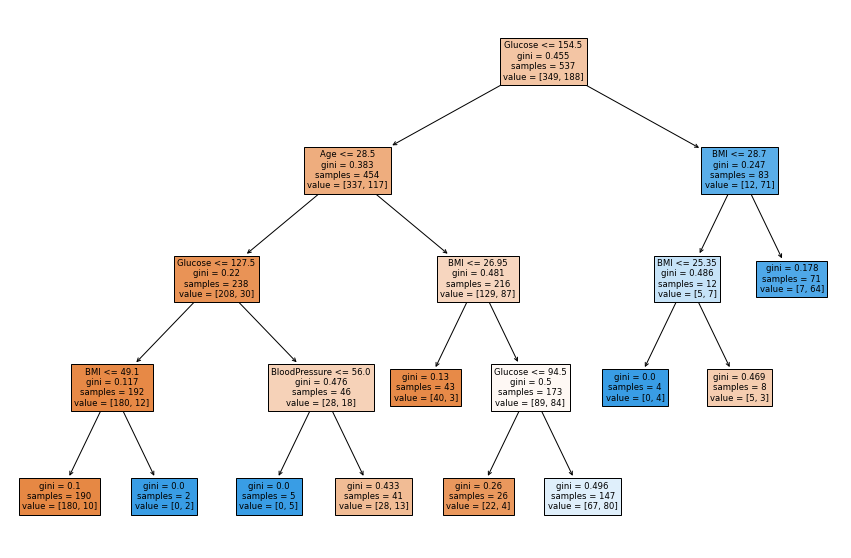

In [23]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_model,filled=True,feature_names=X_train.columns)

In [24]:
submission_preds = dt_model.predict(X_test)
submission_preds

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [25]:
from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, submission_preds))) 

Accuracy = 0.719


In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml

In [27]:
# train different classifiers
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = LinearSVC(random_state=42)
mlp_clf = MLPClassifier(random_state=42)

In [30]:
estimators = [random_forest_clf, extra_trees_clf, svm_clf, mlp_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)
# Generate the scores
[estimator.score(X_train, y_train) for estimator in estimators]




Training the RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Training the ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[1.0, 1.0, 0.5549348230912476, 0.7914338919925512]

In [31]:
"""
Stacking
"""
x_val_predictions = np.empty((len(X_train), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    x_val_predictions[:, index] = estimator.predict(X_train)
    
#Create the blender
rnd_forest_blender = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)
rnd_forest_blender.fit(x_val_predictions, y_train)
# Check the score
rnd_forest_blender.oob_score_ 

1.0

In [34]:
submission_preds = random_forest_clf.predict(X_test)
submission_preds

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])